<a href="https://colab.research.google.com/github/Shreya-chhabra/Datasciencecoursera/blob/Shreya-chhabra-patch-1/Breast_Cancer_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [3]:
!ls

 20141017_182005.jpg   Gopa.pdf
 31052008212.jpg      'Low Back Exercises Program.pdf'
'Cancer Data.xls'     'Shreya Chhabra- BOA.docx'
'Colab Notebooks'     'Shreya Chhabra CV.pdf'
 DSC08029.JPG	      'Shreya EC.pdf'
 Final.rar	      'uzr-bumt-ykg – 19 Jan 2021.gjam'
 Gopa.gdoc


In [4]:
import pandas as pd 
import numpy as np
import seaborn as sn # visualization library based on matplotlib
import matplotlib.pylab as plt

#the output of plotting commands is displayed inline within Jupyter notebook
%matplotlib inline 

In [5]:
raw_df = pd.read_excel('Cancer Data.xls')
raw_df.columns = raw_df.columns.str.lower().str.replace(' ', '_')
raw_df.head()

,id,b-m,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,se-radius,texture-se,perimeter-se,area-se,smoothness-se,compactness-se,concavity-se,concave_points-se,symmetry-se,fractal_dimension-se,radius-w,texture-w,perimeter-w,area-w,smoothness-w,compactness-w,concavity-w,concave_points-w,symmetry-w,fractal_dimension-w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
## Converting y variable into numeric
raw_df['b-m']=np.where(raw_df['b-m']=='M',1,0)
raw_df['b-m'].value_counts()

0    357
1    212
Name: b-m, dtype: int64

In [34]:
X = raw_df.drop(['b-m'], axis=1)
y = raw_df['b-m']

In [9]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
# Feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets
#dataset = datasets.load_iris()
svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 3)
rfe = rfe.fit(X_train, y_train)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[False  True False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False  True False False False]
[22  1  5  6 19 20 11  1 14 18 21 15 13  4 10 28 23 25 26 24 29  3  8  2
  9 17  7  1 27 12 16]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [14]:
FEATURES = list(X_train.columns[rfe.support_])
print('Best features :', FEATURES)

Best features : ['radius', 'concavity', 'concavity-w']


In [19]:
from sklearn.preprocessing import StandardScaler

def preprocess(X):
    #extracting chosen features
    X = X[FEATURES]
    #Standardizing Features
    sc = StandardScaler()
    X = sc.fit_transform(X)
    return X

x_train = preprocess(X_train)
x_train

array([[ 1.0449852 ,  0.37978142,  0.28422474],
       [ 1.68141074,  1.35140244,  0.62678932],
       [-1.44260855, -1.0722744 , -1.26138352],
       ...,
       [ 0.82638686,  0.99218954,  1.88432968],
       [-0.05077356, -0.93583586, -1.02815536],
       [-0.32748032, -0.79863648, -1.09666828]])

In [20]:
#Support Vector Machines
from sklearn.svm import SVC

SV = SVC(probability=True, random_state=0) 
SV.fit(x_train, y_train)
print('SVM Classifier Training Accuracy:', SV.score(x_train, y_train))

SVM Classifier Training Accuracy: 0.9340659340659341


In [21]:
#SVM : with Hyper Parameters Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
SV_0 = SVC(probability=True, random_state=0)

params = {'C': [0.1, 1, 10, 100], 
          'gamma': [1, 0.1, 0.01, 0.001], 
          'kernel': ['rbf', 'poly', 'linear']}

SV_1 = GridSearchCV(SV_0, param_grid=params, n_jobs=-1)
SV_1.fit(x_train,y_train)

print("Best Hyper Parameters:\n",SV_1.best_params_)

print('SVM Classifier Training Accuracy:', SV_1.score(x_train, y_train))

Best Hyper Parameters:
 {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVM Classifier Training Accuracy: 0.9296703296703297


In [23]:
x_test = preprocess(X_test)
x_test

array([[ 2.92635643e-01,  7.69788635e-01,  2.19330547e-01],
       [-1.97911946e-01,  4.80470185e-01,  1.01313899e+00],
       [-2.68912255e-01, -3.08051752e-01, -2.15109667e-01],
       [ 1.46091345e+00, -4.79234667e-02,  3.61034461e-01],
       [ 4.34636261e-01, -4.97787824e-01, -5.23393417e-01],
       [ 7.67046799e-01,  2.44107344e-01,  1.18494219e-01],
       [ 1.74491469e+00,  4.37847377e-01, -2.04892770e-01],
       [ 1.38668586e+00,  3.21603357e-01, -8.45110750e-02],
       [-1.06605209e+00, -4.79059621e-01, -6.85975338e-01],
       [ 2.40999055e-01, -2.12473335e-01, -6.00686461e-01],
       [-8.85324028e-01, -7.09610261e-01, -7.36615608e-01],
       [ 1.31271305e-01,  3.37102560e-01,  4.52542317e-01],
       [ 7.92865093e-01,  1.41300555e+00,  1.02202325e+00],
       [-4.59322174e-01, -7.61661750e-01, -3.50150387e-01],
       [ 3.08772077e-01, -5.72829797e-01, -4.94963792e-01],
       [-2.91503262e-01, -4.79834581e-01, -6.57101499e-01],
       [-5.10958763e-01, -8.45486605e-01

In [24]:
y_pred = pd.DataFrame(SV_1.predict(x_test), columns=['diagnosis'])

Text(0.5, 1.0, 'Confusion matrix')

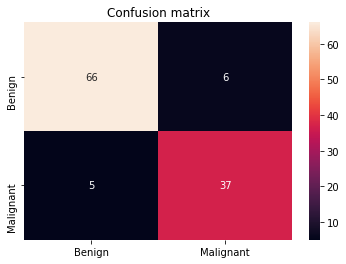

In [26]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.metrics import roc_auc_score
y_pred = pd.DataFrame(SV_1.predict(x_test), columns=['diagnosis'])
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['Benign','Malignant'],yticklabels=['Benign','Malignant'])
plt.title('Confusion matrix')

In [28]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 90.35087719298247


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_pred )
dt_report = (classification_report(y_test,y_pred))
print(dt_report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        72
           1       0.86      0.88      0.87        42

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



In [37]:
X_st_train,X_st_test,Y_st_train,Y_st_test=train_test_split(X,y,test_size=0.2,random_state=40)
X_st_train=scale_.fit_transform(X_st_train)
X_st_test=scale_.transform(X_st_test)
model=svm.LinearSVC(C=1)
model.fit(X_st_train,Y_st_train)
y_st_pred=model.predict(X_st_test)
confusion_matrix(Y_st_test,y_st_pred)

array([[72,  3],
       [ 3, 36]])

In [38]:
roc_auc_score(Y_st_test,y_st_pred)

0.9415384615384614

In [39]:
print(classification_report(Y_st_test,y_st_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.92      0.92      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



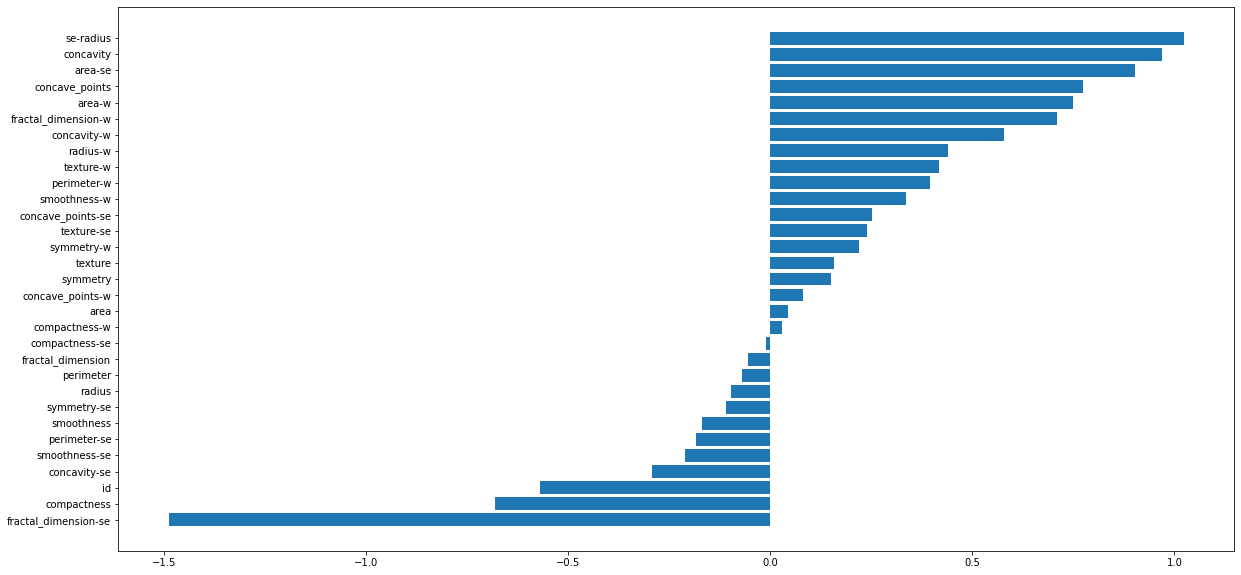

In [46]:
imp,names=zip(*sorted(zip(model.coef_[0],X)))
plt.figure(figsize=(20,10))
plt.barh(range(len(names)),imp,align='center')

plt.yticks(range(len(names)), names)

plt.show()

In [44]:
d={'Vars':X,'Significance':model.coef_[0],'Significance_abs':np.abs(model.coef_[0])}
sig_feat=pd.DataFrame(d)

In [45]:
sig_feat.loc[sig_feat['Significance_abs']>=0.5].sort_values(['Significance_abs'],ascending=False)

,Vars,Significance,Significance_abs
20,"(f, r, a, c, t, a, l, _, d, i, m, e, n, s, i, ...",-1.486920,1.486920
11,"(s, e, -, r, a, d, i, u, s)",1.022955,1.022955
7,"(c, o, n, c, a, v, i, t, y)",0.970457,0.970457
14,"(a, r, e, a, -, s, e)",0.903939,0.903939
8,"(c, o, n, c, a, v, e, _, p, o, i, n, t, s)",0.774908,0.774908
24,"(a, r, e, a, -, w)",0.749185,0.749185
30,"(f, r, a, c, t, a, l, _, d, i, m, e, n, s, i, ...",0.708779,0.708779
6,"(c, o, m, p, a, c, t, n, e, s, s)",-0.679483,0.679483
27,"(c, o, n, c, a, v, i, t, y, -, w)",0.579134,0.579134
0,"(i, d)",-0.569012,0.569012


In [47]:
sig_feat.loc[sig_feat['Significance']<0].sort_values(['Significance'],ascending=True)

,Vars,Significance,Significance_abs
20,"(f, r, a, c, t, a, l, _, d, i, m, e, n, s, i, ...",-1.486920,1.486920
6,"(c, o, m, p, a, c, t, n, e, s, s)",-0.679483,0.679483
0,"(i, d)",-0.569012,0.569012
17,"(c, o, n, c, a, v, i, t, y, -, s, e)",-0.292003,0.292003
15,"(s, m, o, o, t, h, n, e, s, s, -, s, e)",-0.210846,0.210846
13,"(p, e, r, i, m, e, t, e, r, -, s, e)",-0.182505,0.182505
5,"(s, m, o, o, t, h, n, e, s, s)",-0.168020,0.168020
19,"(s, y, m, m, e, t, r, y, -, s, e)",-0.109887,0.109887
1,"(r, a, d, i, u, s)",-0.095814,0.095814
3,"(p, e, r, i, m, e, t, e, r)",-0.070281,0.070281
